## Problems

### Conversion
1.	Is it possible to predict customer conversion (from viewing to purchasing)?
2.	Can we identify “new customers”? If yes then what is the best strategy to work with them?
3.	What are the top features that define customer conversion?
4.	Can we explain and visualize the predictive model for customer conversion on a journey and at a session level?
5.	Is there a pattern and trend across product types regarding the conversion event?

### Personalization
1.	Can we personalize the experience from customer-product interactions?
2.	Does the product catalogue information help in improving customer experience?
3.	Can personalized shopping experience be predictively modeled?
4.	Can we apply transfer learning from other E-commerce data sets to our local data set?

In [7]:
!pip install -r requirements.txt

     |█████████████████████           | 297.7 MB 123.1 MB/s eta 0:00:02   |███▉                            | 54.9 MB 23.9 MB/s eta 0:00:17

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 454.3 MB 114.1 MB/s eta 0:00:01     |████████████████████████████████| 454.3 MB 12 kB/s 
     |████████████████████████████████| 462 kB 116.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 278 kB/s  eta 0:00:01
     |████████████████████████████████| 1.2 MB 114.6 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 116.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.8 MB/s s eta 0:00:01
     |████████████████████████████████| 6.0 MB 113.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 106.0 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 13.3 MB/s  eta 0:00:01
     |████████████████████████████████| 4.9 MB 112.3 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 107.7 MB/s eta 0:00:01
     |████████████████████████████████| 147 kB 109.2 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 109.4 MB/s eta 0:00:01
     |█████████████████████████████

## Preprocessing

In [1]:
from groupby_user_conversion import GroupBy, FeatureSelection, Evaluation

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
g = GroupBy('raw_data.json')
preprocessed_data = g.preprocessing_for_bin_class()

Feature "timeOnSiteSeconds" is highly related to "sessionDuration". Remove "timeOnSiteSeconds"
Feature "uniqueNavigations" is highly related to "uniqueRefinements". Remove "uniqueNavigations"
Feature "totalRefinements" is highly related to "uniqueRefinements". Remove "totalRefinements"
Feature "source" is highly related to "has_campaign". Remove "source"
Feature "uniqueViewProducts" is highly related to "totalViewProductRevenue". Remove "uniqueViewProducts"
Feature "totalViewProducts" is highly related to "totalViewProductRevenue". Remove "totalViewProducts"
Feature "events" is highly related to "totalSearches". Remove "events"
Feature "totalAddToCarts" is highly related to "totalAddToCartRevenue". Remove "totalAddToCarts"
Feature "uniqueAddToCarts" is highly related to "totalAddToCartRevenue". Remove "uniqueAddToCarts"
28


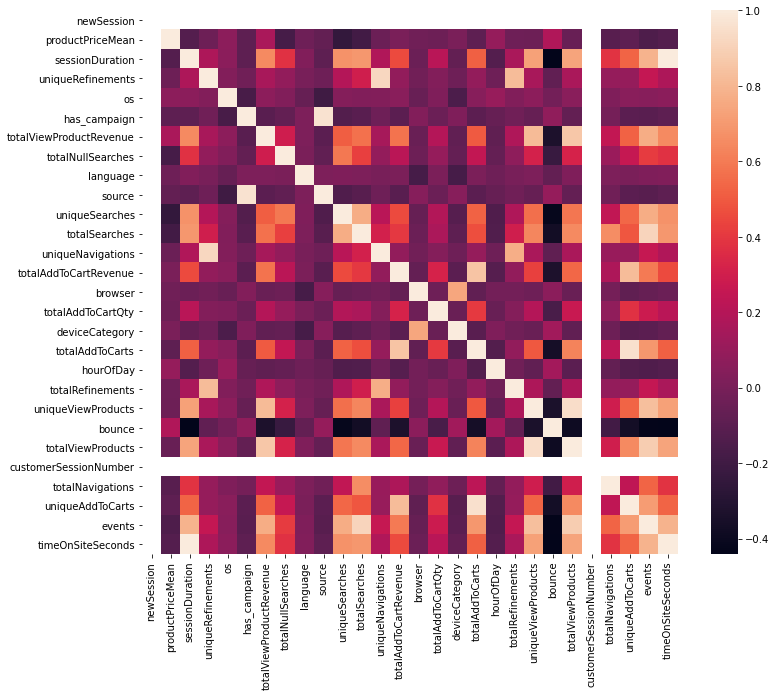

               score                  feature
feature 6   0.113431  totalViewProductRevenue
feature 2   0.068755          sessionDuration
feature 11  0.057859    totalAddToCartRevenue
feature 1   0.045794         productPriceMean
feature 13  0.037921        totalAddToCartQty
feature 15  0.014445                hourOfDay


In [3]:
# Select features
new_features = FeatureSelection.by_coorelation(preprocessed_data['features'], debug=True)
new_features = FeatureSelection.by_permutation_importance(x=new_features, y=preprocessed_data['label'], debug=True)

## XGBoost Model Training

In [4]:
xgb_model, test_x, test_y = GroupBy.train_xgb_bin_class(new_features, preprocessed_data['label'])

In [5]:
Evaluation.evaluate_model(test_x, test_y, xgb_model)

,0,1,accuracy,macro avg,weighted avg
precision,0.972228,0.734303,0.952627,0.853266,0.951772
recall,0.976052,0.703595,0.952627,0.839824,0.952627
f1-score,0.974136,0.718621,0.952627,0.846379,0.952168
support,14490.000000,1363.000000,0.952627,15853.000000,15853.000000


## Sequential Model Training

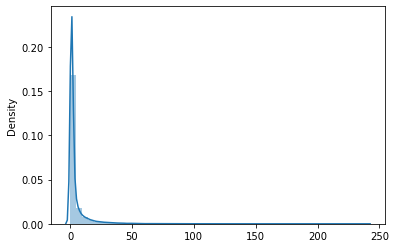

In [6]:
preprocessed_data_for_lstm = g.preprocessing_for_sequence_model(num_of_events=30, debug=True)

In [7]:
lstm_model, test_x, test_y = GroupBy.train_lstm(
    preprocessed_data_for_lstm['features'], preprocessed_data_for_lstm['label'])

Epoch 1/150
27/27 [==============================] - 24s 77ms/step - loss: 0.6851 - recall: 0.6246 - val_loss: 0.6559 - val_recall: 0.8764
Epoch 2/150
27/27 [==============================] - 0s 11ms/step - loss: 0.6418 - recall: 0.8887 - val_loss: 0.5992 - val_recall: 0.9028
Epoch 3/150
27/27 [==============================] - 0s 11ms/step - loss: 0.5767 - recall: 0.9058 - val_loss: 0.5205 - val_recall: 0.9110
Epoch 4/150
27/27 [==============================] - 0s 11ms/step - loss: 0.4894 - recall: 0.9125 - val_loss: 0.4391 - val_recall: 0.9150
Epoch 5/150
27/27 [==============================] - 0s 11ms/step - loss: 0.4117 - recall: 0.9158 - val_loss: 0.3708 - val_recall: 0.9175
Epoch 6/150
27/27 [==============================] - 0s 11ms/step - loss: 0.3470 - recall: 0.9180 - val_loss: 0.3227 - val_recall: 0.9191
Epoch 7/150
27/27 [==============================] - 0s 10ms/step - loss: 0.3023 - recall: 0.9194 - val_loss: 0.2919 - val_recall: 0.9202
Epoch 8/150
27/27 [==============

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


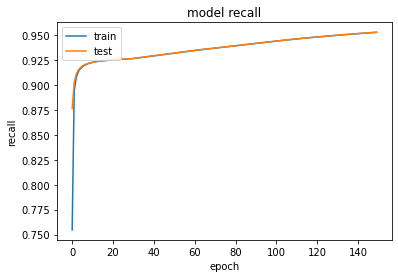

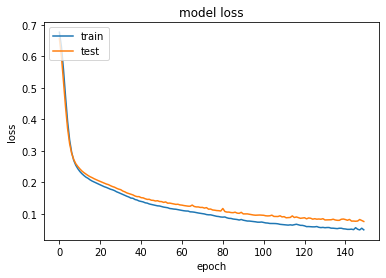

In [8]:
Evaluation.plot_history(lstm_model.history)

In [9]:
Evaluation.evaluate_nn_model(test_x, test_y, lstm_model)

Accuracy: 0.965869
Precision: 0.853392
Recall: 0.693333
F1 score: 0.765081
